In [17]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt

In [18]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)

,n [count],H [mm],b [mm],d [mm],γ [N/mm3],Pmax [N],P0 [N]
0,3,90.0,19.4114,5.0,0.000016,9.080644,0.046939
1,3,90.0,12.9410,5.0,0.000016,8.758713,0.154249
2,6,90.0,19.4114,5.0,0.000016,11.753734,0.720029
3,6,90.0,12.9410,5.0,0.000016,10.797683,1.032218
4,F,90.0,19.4114,5.0,0.000016,14.095079,2.017568


In [19]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

The shape of our feature is (177, 7)


In [20]:
#summary statistics
features.describe()
features.columns.values

array(['n [count]', 'H [mm]', 'b [mm]', 'd [mm]', 'γ [N/mm3]', 'Pmax [N]',
       'P0 [N]'], dtype=object)

In [21]:
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)

In [22]:
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

In [23]:
#target pmax
pmax = features['Pmax [N]']
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
#features = np.array(features)



#print(features)
print_shape(features)

The shape of our feature is (177, 11)


In [24]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [25]:
rf = RandomForestRegressor(n_estimators = 281, random_state = 187)
rf.fit(train_features, train_labels)
#Make Predictions
#Use the forest's predict method on the test data 
predictions = rf.predict(test_features)

#Calculate the absolute errors
errors = abs(predictions - test_labels)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.17 newton.
Accuracy: 86.31 %.


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv_r2_scores_rf = cross_val_score(rf, features, pmax, cv = 5)
print(cv_r2_scores_rf)
print("Mean 10-fold R squared :{}". format(np.mean(cv_r2_scores_rf)))

[0.90789051 0.89347768 0.68629347 0.78959391 0.80871435]
Mean 10-fold R squared :0.8171939817072079


In [27]:
number_of_splits = []
mean_score = []

In [28]:
for j in range(2, 11):
    kf = KFold(n_splits = j, shuffle = True)
    rf_reg = RandomForestRegressor()
    scores = []
    for i in range(5):
        result = next(kf.split(features), None)
        x_train = pd.DataFrame(features).iloc[result[0]]
        x_test = pd.DataFrame(features).iloc[result[1]]
        y_train = pmax.iloc[result[0]]
        y_test = pmax.iloc[result[1]]
        model = rf_reg.fit(x_train,y_train)
        predictions = rf_reg.predict(x_test)
        scores.append(model.score(x_test,y_test))
    print('Scores from each Iteration: ', scores)
    number_of_splits.append(j)
    print('Average K-Fold Score :' , np.mean(scores))
    mean_score.append(np.mean(scores))

Scores from each Iteration:  [0.8507520576183741, 0.8850868516503871, 0.8861957264095589, 0.8628645108306175, 0.9099721803713684]
Average K-Fold Score : 0.8789742653760613
Scores from each Iteration:  [0.8989326373305938, 0.8429726952250348, 0.9174117163104025, 0.8923594655664505, 0.9069915873141261]
Average K-Fold Score : 0.8917336203493216


C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores from each Iteration:  [0.9428340191222638, 0.9062192288661012, 0.904226128646391, 0.8966982177764853, 0.8638221178033503]
Average K-Fold Score : 0.9027599424429182
Scores from each Iteration:  [0.7898891657356046, 0.9327598279265302, 0.8386278169241969, 0.8999054878634858, 0.9760141253724205]
Average K-Fold Score : 0.8874392847644476
Scores from each Iteration:  [0.794504408311654, 0.831707195789048, 0.8903873800463629, 0.960229438874028, 0.91811763226337]
Average K-Fold Score : 0.8789892110568926


C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores from each Iteration:  [0.8886475438930181, 0.933401678151431, 0.8315854452543406, 0.8219975971573508, 0.9513819019996924]
Average K-Fold Score : 0.8854028332911665
Scores from each Iteration:  [0.89453784959518, 0.8705552862256021, 0.952506843005945, 0.7918389954580989, 0.9366499858153028]
Average K-Fold Score : 0.8892177920200257
Scores from each Iteration:  [0.9408646073525044, 0.9521892351205714, 0.9031731745470357, 0.9355687017223759, 0.9766050791696513]
Average K-Fold Score : 0.9416801595824278
Scores from each Iteration: 

C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 [0.9275692240666222, 0.825923837516843, 0.9532911625800942, 0.9671957881332034, 0.8836995413552547]
Average K-Fold Score : 0.9115359107304035


In [29]:
print(number_of_splits)
print(mean_score)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.8789742653760613, 0.8917336203493216, 0.9027599424429182, 0.8874392847644476, 0.8789892110568926, 0.8854028332911665, 0.8892177920200257, 0.9416801595824278, 0.9115359107304035]


In [30]:
k_fold = {'number of splits': number_of_splits, 'mean classification score': mean_score}
df = DataFrame(k_fold, columns= ['number of splits', 'mean classification score'])
print(df)
print(np.mean(mean_score))

   number of splits  mean classification score
0                 2                   0.878974
1                 3                   0.891734
2                 4                   0.902760
3                 5                   0.887439
4                 6                   0.878989
5                 7                   0.885403
6                 8                   0.889218
7                 9                   0.941680
8                10                   0.911536
0.8964147799570737


In [31]:
#export_csv = df.to_csv (r'/Users/zhenjiang/Desktop/cx4240/Project/export_dataframe.csv', index = None, header=True)

In [36]:
x = df["number of splits"]
y = df["mean classification score"]

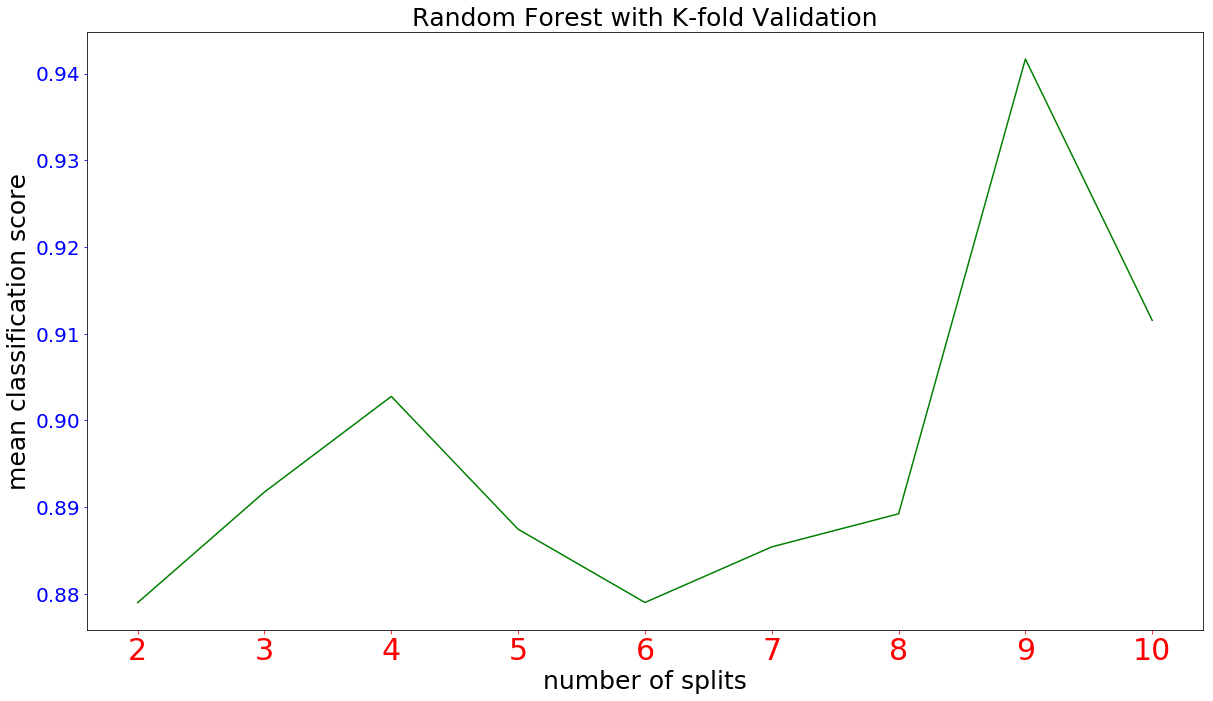

In [45]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("number of splits", fontsize = 25)
plt.ylabel("mean classification score", fontsize = 25)
plt.title("Random Forest with K-fold Validation", fontsize = 25)
plt.plot(x, y, color = "g")
plt.tick_params(axis="x", colors='r', labelsize = 30)
plt.tick_params(axis="y", colors = "b" , labelsize = 20)


plt.savefig("K-fold_validation.png")

In [32]:
#import seaborn as sns

In [33]:

#df = pd.read_csv("export_dataframe.csv")
#sns.set_palette("husl")
#sns.set_style('white')
#sns.set_style('ticks')
#ax = sns.lineplot(x="number of splits", y= 'mean classification score', data= df )
#fig = ax.get_figure()
#fig.savefig("kfold.png")